In [1]:
import retentioneering

# Basic example

In [2]:
# load sample data
from retentioneering import datasets
data = datasets.load_simple_shop()

# setup column names:
retentioneering.config.update({
    'event_col':'event',
    'event_time_col':'timestamp',
    'index_col': 'user_id'
})

# Trajectories vectorization

In [4]:
vec = data.rete.extract_features(feature_type='count',
                                 ngram_range=(1, 1))

vec

,cart,catalog,delivery_choice,delivery_courier,delivery_pickup,lost,main,payment_card,payment_cash,payment_choice,payment_done,product1,product2
122915,1,18,0,0,0,1,7,0,0,0,0,4,2
463458,0,8,0,0,0,1,1,0,0,0,0,0,1
1475907,1,5,1,1,0,1,2,0,0,1,0,1,2
1576626,0,0,0,0,0,1,1,0,0,0,0,0,0
2112338,0,3,0,0,0,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999275109,1,2,1,0,1,1,0,0,0,0,0,0,0
999642905,1,2,1,1,0,0,1,0,0,1,1,0,0
999914554,1,10,0,0,0,1,5,0,0,0,0,1,0
999916163,2,2,0,0,0,1,0,0,0,0,0,0,0


In [9]:
data.rete.extract_features(feature_type='tfidf',
                           ngram_range=(1, 1))

,cart,catalog,delivery_choice,delivery_courier,delivery_pickup,lost,main,payment_card,payment_cash,payment_choice,payment_done,product1,product2
122915,0.071095,0.796693,0.000000,0.000000,0.000000,0.050792,0.433586,0.0,0.0,0.000000,0.000000,0.376298,0.167480
463458,0.000000,0.950397,0.000000,0.000000,0.000000,0.136331,0.166254,0.0,0.0,0.000000,0.000000,0.000000,0.224765
1475907,0.190821,0.593985,0.230837,0.298851,0.000000,0.136328,0.332502,0.0,0.0,0.270565,0.000000,0.252498,0.449520
1576626,0.000000,0.000000,0.000000,0.000000,0.000000,0.634086,0.773263,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2112338,0.000000,0.704163,0.000000,0.000000,0.000000,0.269359,0.656962,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999275109,0.355102,0.442142,0.429567,0.000000,0.655381,0.253694,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
999642905,0.289277,0.360183,0.349939,0.453045,0.000000,0.000000,0.252029,0.0,0.0,0.410166,0.476576,0.000000,0.000000
999914554,0.128042,0.797132,0.000000,0.000000,0.000000,0.091477,0.557774,0.0,0.0,0.000000,0.000000,0.169427,0.000000
999916163,0.812397,0.505763,0.000000,0.000000,0.000000,0.290199,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


# Clustering

In [10]:
data.rete.get_clusters(method='kmeans',
                       n_clusters=8,
                       refit_cluster=True,
                       feature_type='tfidf',
                       ngram_range=(1,2));

In [11]:
data.rete.cluster_mapping

# Visualizing results

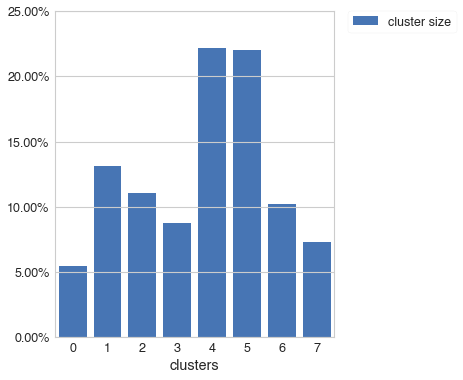

In [12]:
data.rete.get_clusters(method='kmeans',
                       n_clusters=8,
                       refit_cluster=True,
                       feature_type='tfidf',
                       ngram_range=(1,2),
                       plot_type='cluster_bar');

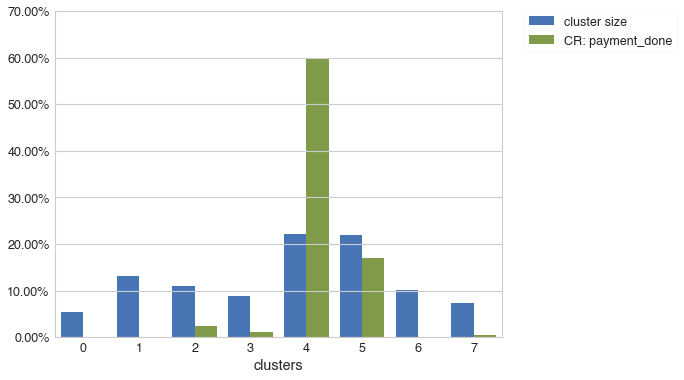

In [13]:
data.rete.get_clusters(method='kmeans',
                       n_clusters=8,
                       refit_cluster=True,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['payment_done']);

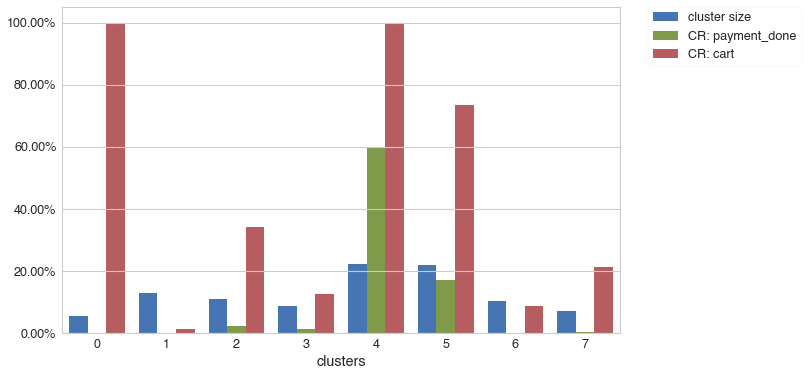

In [14]:
data.rete.get_clusters(method='kmeans',
                       n_clusters=8,
                       refit_cluster=True,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['payment_done','cart']);

# Exploring individual clusters

In [15]:
clus_4 = data.rete.filter_cluster(4)

In [16]:
clus_4.rete.plot_graph(thresh=0.1,
                       weight_col='user_id',
                       targets = {'lost':'red',
                                  'payment_done':'green'})

'experiments/index.html'

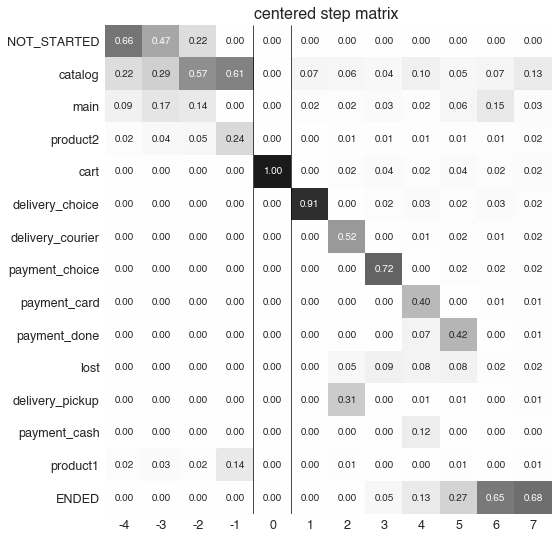

In [17]:
clus_4.rete.step_matrix(max_steps=12,
                        centered={'event': 'cart',
                                  'left_gap': 4,
                                  'occurrence': 1});

In [18]:
clus_0_7 = data.rete.filter_cluster([0,7])

# Compare clusters

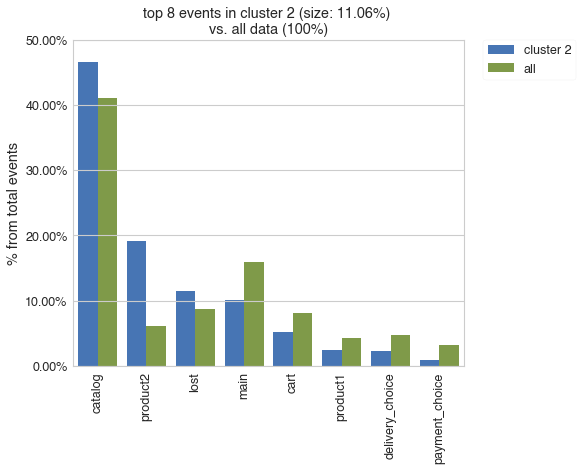

In [19]:
data.rete.cluster_event_dist(2)

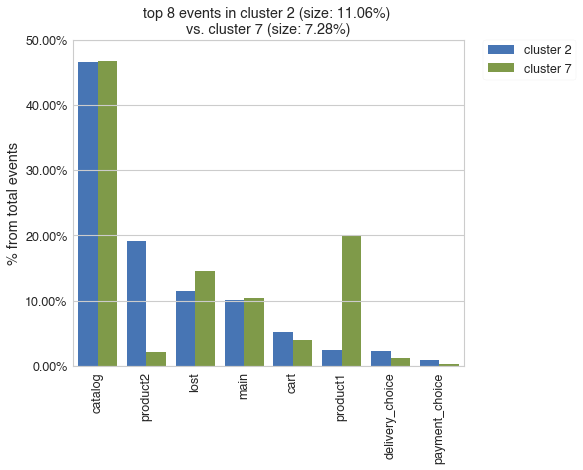

In [20]:
data.rete.cluster_event_dist(2, 7)

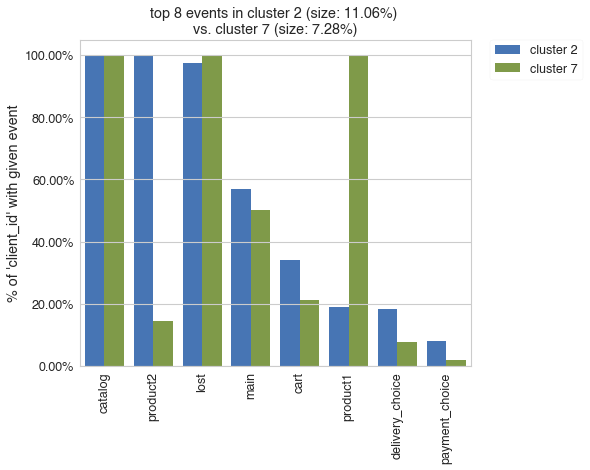

In [21]:
data.rete.cluster_event_dist(2, 7,
                            weight_col='user_id')

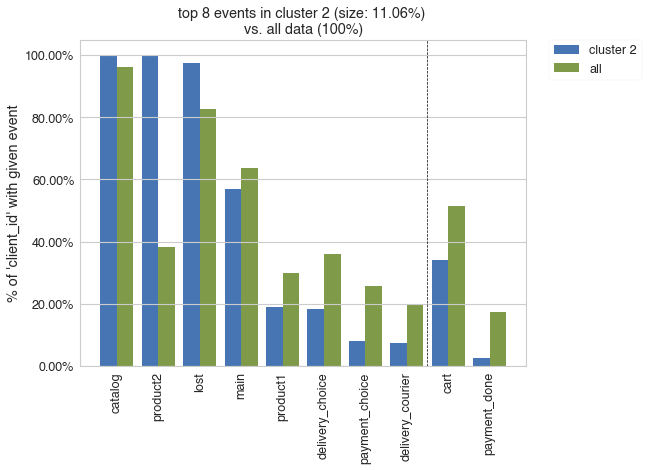

In [22]:
data.rete.cluster_event_dist(2,
                            weight_col='user_id',
                            targets=['cart','payment_done'])